# Notebook of Feature Selection of important phenotypes covariables for IBD patients

## Packages

In [ ]:
import subprocess

def instalar_paquetes():
    paquetes = [
        "appnope==0.1.4",
        "asttokens==3.0.0",
        "cloudpickle==3.1.1",
        "comm==0.2.2",
        "contourpy==1.3.2",
        "cycler==0.12.1",
        "debugpy==1.8.14",
        "decorator==5.2.1",
        "executing==2.2.0",
        "fonttools==4.57.0",
        "ipykernel==6.29.5",
        "ipython==9.2.0",
        "ipython_pygments_lexers==1.1.1",
        "jedi==0.19.2",
        "joblib==1.5.0",
        "jupyter_client==8.6.3",
        "jupyter_core==5.7.2",
        "kiwisolver==1.4.8",
        "llvmlite==0.44.0",
        "matplotlib==3.10.1",
        "matplotlib-inline==0.1.7",
        "nest-asyncio==1.6.0",
        "numba==0.61.2",
        "numpy==2.2.5",
        "packaging==25.0",
        "pandas==2.2.3",
        "parso==0.8.4",
        "pexpect==4.9.0",
        "pillow==11.2.1",
        "platformdirs==4.3.7",
        "prompt_toolkit==3.0.51",
        "psutil==7.0.0",
        "ptyprocess==0.7.0",
        "pure_eval==0.2.3",
        "Pygments==2.19.1",
        "pyparsing==3.2.3",
        "python-dateutil==2.9.0.post0",
        "pytz==2025.2",
        "pyzmq==26.4.0",
        "scikit-learn==1.6.1",
        "scipy==1.15.3",
        "seaborn==0.13.2",
        "shap==0.47.2",
        "six==1.17.0",
        "slicer==0.0.8",
        "stack-data==0.6.3",
        "threadpoolctl==3.6.0",
        "tornado==6.4.2",
        "tqdm==4.67.1",
        "traitlets==5.14.3",
        "typing_extensions==4.14.0",
        "tzdata==2025.2",
        "wcwidth==0.2.13",
        "xgboost==3.0.2"
    ]
    
    for paquete in paquetes:
        subprocess.run(["pip", "install", paquete])

# Ejecuta esta función
#instalar_paquetes()



  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 10.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [contourpy]/2 [contourpy]
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.57.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (102 kB)
Using cached fonttools-4.57.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
  Using cached ipython-9.2.0-py3-none-any.whl.metadata (4.4 kB)
Using cached ipython-9.2.0-py3-none-any.whl (604 kB)
  Attempting uninstall: ipython
    Found existing installation: ipython 9.3.0
    Uninstalling ipython-9.3.0:
      Successfully uninstalled ipython-9.3.0
  

In [171]:
# Import the required libraries for data analysis and visualization
import pandas as pd # Para manejar dataframes
import numpy as np # Para operaciones matemáticas
import os # Para manejar rutas
import matplotlib.pyplot as plt # Para graficar
import seaborn as sns # Para graficar
import re # Para quitar el patron '_0_0'
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer
from sklearn.impute import IterativeImputer # IterativeImputer
from scipy import stats # Para outliers
import shap # Para SHAP
from sklearn.model_selection import train_test_split # Para dividir el conjunto de datos
from sklearn.ensemble import RandomForestClassifier # Para Random Forest
from sklearn.metrics import classification_report # Para evaluar
from sklearn.preprocessing import LabelEncoder # Para pasar variables categoricas a numericas
import xgboost as xgb # XGboost for classification
import openpyxl


## Set paths

In [254]:
# Set the paths
path = "/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/1.Datos_Raw"
path_outputs = "/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/Output"

## Charge data

In [266]:
#Charge the dataframes

# Plexus Metadata
plexus_metadata = pd.read_excel(os.path.join(path,"Metadata_plexus.xlsx"))
plexus_metadata

,INVESTIGATION_TITLE,IBD_PLEXUS_DATA_RELEASE_DATE,INVESTIGATION_DISEASE,INVESTIGATION_DESCRIPTION,INVESTIGATION_CONT_LAST_NAME,INVESTIGATION_CONT_FIRST_NAME,INVESTIGATION_CONT_EMAIL,INVESTIGATION_CONT_INST/ORG,STUDY_TITLE,STUDY_DISEASE,...,RNASEQ_60,WHOLE_SHOTGUN_SEQUENCING_WGS_60,ITS2_SEQUENCING_60,VIRAL_METAGENOMICS_SEQUENCING_VIROME_60,PROTEOMIC_BIOMARKER_PANELS_OLINK_60,BMI,BMI_DATE,DISEASE_LOCATION,UPPERGI,PERIANAL
0,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,1.0,1.0,NaN,1,25.679102,2017-07-13,NaN,NaN,Unknown
1,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileocolonic,Unknown,Unknown
2,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileocolonic,No,Unknown
3,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,1.0,NaN,NaN,NaN,1,NaN,NaT,Ileocolonic,No,Unknown
4,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,1.0,1.0,1.0,NaN,1,23.147886,2019-08-07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileal,No,No
2246,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,NaN,NaN,NaN
2247,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileal,No,No
2248,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,1.0,1.0,1.0,NaN,1,27.141737,2020-08-06,Ileocolonic,NaN,No


## Limpieza

### Eliminar NAs

In [267]:
# Drop columnas con mas de 50% de NA
threshold = 0.5 * len(plexus_metadata)
plexus_metadata = plexus_metadata.dropna(thresh=threshold, axis=1)

#Elimina columnas con solo un valor unico 
plexus_metadata = plexus_metadata.loc[:, plexus_metadata.nunique() > 1]


In [257]:
plexus_metadata

,SAMPLE_COLLECTED_DATE,RAW_DATA_FILE_NAME,REQUESTED_FILE_NAME,INDEX_DATE,DATA_NUMBER,DATE_OF_CONSENT,DATE_OF_CONSENT_1,BIRTH_YEAR,SEX,DIAGNOSIS,...,SCDAI_SOURCE,SCDAI_CATEGORY,PGA,PGA_DATE,DISEASE_ACTIVITY_60,BMI,BMI_DATE,DISEASE_LOCATION,UPPERGI,PERIANAL
0,2017-07-13,10430233.0,10430233.0,2017-07-13,1,2017-07-13,2017-07-13,1947,Female,Crohn's Disease,...,SF,Mild,Mild,2017-07-13,Mild,25.679102,2017-07-13,NaN,NaN,Unknown
1,2021-10-17,FR23841213,FR23841213,2021-10-17,1,2021-10-17,2021-10-17,1965,Female,Crohn's Disease,...,SF,Moderate,Moderate,2021-10-17,Moderate,NaN,NaT,Ileocolonic,Unknown,Unknown
2,2019-02-20,FR17213021,FR17213021,2019-02-20,1,2019-02-20,2019-02-20,1955,Female,Crohn's Disease,...,SF,Remission,Quiescent,2019-02-20,Remission,NaN,NaT,Ileocolonic,No,Unknown
3,2021-04-21,FR23829990,FR23829990,2021-04-21,2,2019-02-20,2019-02-20,1955,Female,Crohn's Disease,...,ECRF,Moderate,Moderate,2021-05-04,Moderate,NaN,NaT,Ileocolonic,No,Unknown
4,2019-08-07,FR20539652,FR20539652,2019-08-07,1,2019-08-07,2019-08-07,1987,Male,Ulcerative Colitis,...,NaN,NaN,NaN,NaT,Remission,23.147886,2019-08-07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2021-11-21,FR27851455,FR27851455,2021-11-21,1,2021-11-21,2021-11-21,1996,Male,Crohn's Disease,...,ECRF,Remission,Mild,2021-12-04,Remission,NaN,NaT,Ileal,No,No
2246,2021-11-25,FR24484026,FR24484026,2021-11-25,1,2021-11-25,2021-11-25,1998,Female,Ulcerative Colitis,...,NaN,NaN,Moderate,2021-11-25,Mild,NaN,NaT,NaN,NaN,NaN
2247,2021-12-04,FR24484087,FR24484087,2021-12-04,1,2021-12-04,2021-12-04,1994,Female,Crohn's Disease,...,SF,Moderate,Mild,2021-12-04,Moderate,NaN,NaT,Ileal,No,No
2248,2020-07-15,FR21153371,FR21153371,2020-07-15,2,2019-09-20,2019-09-20,1956,Male,Crohn's Disease,...,ECRF,Remission,Quiescent,2020-08-13,Remission,27.141737,2020-08-06,Ileocolonic,NaN,No


In [268]:
for col in plexus_metadata.columns:
    print(col)


SAMPLE_COLLECTED_DATE
RAW_DATA_FILE_NAME
REQUESTED_FILE_NAME
INDEX_DATE
DATA_NUMBER
DATE_OF_CONSENT
DATE_OF_CONSENT_1
BIRTH_YEAR
SEX
DIAGNOSIS
DIAGNOSIS_DATE
RACE
ETHNICITY
BLOOD_DNA_EXTRACTION
BLOOD_PBMCS
BLOOD_PLASMA
BLOOD_RNA_IN_PAXGENE_TUBES_TO_BE_ISOLATED
STOOL_ETHANOL
STOOL_NO_PRESERVATIVE
TISSUE_DNA_EXTRACTION
TISSUE_PARAFFIN_BLOCK_FORMALIN_FIXED
TISSUE_RNA_EXTRACTION
TISSUE_RNALATER
TISSUE_SLIDE_FROM_PARAFFIN_BLOCK_FORMALIN_FIXED
TOTAL_BLOOD_DNA_EXTRACTION
TOTAL_BLOOD_PBMCS
TOTAL_BLOOD_PLASMA
TOTAL_BLOOD_RNA_IN_PAXGENE_TUBES_TO_BE_ISOLATED
TOTAL_TISSUE_DNA_EXTRACTION
TOTAL_TISSUE_PARAFFIN_BLOCK_FORMALIN_FIXED
TOTAL_TISSUE_RNA_EXTRACTION
TOTAL_TISSUE_RNALATER
TOTAL_TISSUE_SLIDE_FROM_PARAFFIN_BLOCK_FORMALIN_FIXED
TOTAL_STOOL_ETHANOL
TOTAL_STOOL_NO_PRESERVATIVE
TOTAL_PROTEOMIC_BIOMARKER_PANELS_OLINK
TOTAL_RNASEQ
CROHNS_DISEASE_PHENOTYPE
PHENOTYPE_ANAL_STRICTURE
PHENOTYPE_ESOPHAGEAL_STRICTURE
PHENOTYPE_ILEAL_STRICTURE
PHENOTYPE_JEJUNAL_STRICTURE
CD_PHENO_JOURNEY
ANAL_PHENOTYPE
DUOD

In [269]:
# Lista explícita de columnas a eliminar
columnas_a_eliminar = [
    "REQUESTED_FILE_NAME",
    "INDEX_DATE",
    "DATA_NUMBER",
    "DATE_OF_CONSENT",
    "DATE_OF_CONSENT_1",
    "BLOOD_DNA_EXTRACTION",
    "BLOOD_PBMCS",
    "BLOOD_PLASMA",
    "BLOOD_RNA_IN_PAXGENE_TUBES_TO_BE_ISOLATED",
    "STOOL_ETHANOL",
    "STOOL_NO_PRESERVATIVE",
    "TISSUE_DNA_EXTRACTION",
    "TISSUE_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TISSUE_RNA_EXTRACTION",
    "TISSUE_RNALATER",
    "TISSUE_SLIDE_FROM_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TOTAL_BLOOD_DNA_EXTRACTION",
    "TOTAL_BLOOD_PBMCS",
    "TOTAL_BLOOD_PLASMA",
    "TOTAL_BLOOD_RNA_IN_PAXGENE_TUBES_TO_BE_ISOLATED",
    "TOTAL_TISSUE_DNA_EXTRACTION",
    "TOTAL_TISSUE_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TOTAL_TISSUE_RNA_EXTRACTION",
    "TOTAL_TISSUE_RNALATER",
    "TOTAL_TISSUE_SLIDE_FROM_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TOTAL_STOOL_ETHANOL",
    "TOTAL_STOOL_NO_PRESERVATIVE",
    "TOTAL_PROTEOMIC_BIOMARKER_PANELS_OLINK",
    "TOTAL_RNASEQ",
    "SCDAI_DATE",
    "PGA_DATE",
    "BMI_DATE",
    "DAILY_BM_VERSION",
    "DISEASE_ACTIVITY_60",
    "PGA",
    "SCDAI_CATEGORY",
    "SCDAI_SOURCE",
    "SCDAI_SCORE",
    "GENERAL_WELL_BEING_SCORE",
    "CD_PHENO_JOURNEY",
    "CROHNS_DISEASE_PHENOTYPE",
    "PHENOTYPE_ANAL_STRICTURE",
    "PHENOTYPE_ESOPHAGEAL_STRICTURE",
    "PHENOTYPE_ILEAL_STRICTURE",
    "PERIANAL",
    "UPPERGI",
    "DISEASE_LOCATION",
    "DAILY_BM",
    "ABDOMINAL_PAIN_SCORE",
    "COLON_RESECTION_CECUM",
    "COLON_RESECTION_RECTUM",
    "COLON_RESECTION_SIGMOID",
    "PERIANAL_FISTULA",
    "FECAL_URGENCY",
    "ESOPHAGEAL_SURGERY"
]

# Eliminar columnas explícitas
plexus_metadata = plexus_metadata.drop(columns=columnas_a_eliminar, errors='ignore')

# Además, eliminar columnas que contienen "PHENOTYPE" en el nombre
cols_con_phenotype = plexus_metadata.columns[plexus_metadata.columns.str.contains("PHENOTYPE", case=False)]
plexus_metadata = plexus_metadata.drop(columns=cols_con_phenotype)


In [270]:
for col in plexus_metadata.columns:
    print(col)


SAMPLE_COLLECTED_DATE
RAW_DATA_FILE_NAME
BIRTH_YEAR
SEX
DIAGNOSIS
DIAGNOSIS_DATE
RACE
ETHNICITY
NUMBER_OF_IBD_SURGERIES
GASTRODUODENAL_SURGERY
SMALL_BOWEL_RESECTION
SMALL_BOWEL_RESECTION_DUODENUM
SMALL_BOWEL_RESECTION_ILEUM
SMALL_BOWEL_RESECTION_JEJUNUM
COLON_RESECTION
COMPLETE_COLECTOMY
ILEOSTOMY/COLOSTOMY
STRICTUROPLASTY
PHYSIOLOGICAL_SHORT_GUT_SYNDROME
TOBACCO_USE_WITHIN_LAST_7_DAYS
TOBACCO_USE_WITHIN_LAST_3_MONTHS
ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS
APHTHOUS_ULCER
ERYTHEMA_NODOSUM
IBD_ASSOCIATED_ARTHROPATHY
IRITIS/UVEITIS
PRIMARY_SCLEROSING_CHOLANGITIS
PYODERMA_GANGRENOSUM
THROMBOTIC_COMPLICATIONS
MALIGNANT_NEOPLASM_OF_COLON_UNSPECIFIED
PERSONAL_HISTORY_OF_CERVICAL_DYSPLASIA
ADALIMUMAB
CERTOLIZUMAB_PEGOL
CORTICOSTEROIDS
GOLIMUMAB
INFLIXIMAB_UNSPECIFIED
MESALAMINE
METHOTREXATE
NATALIZUMAB
OTHER_BIOLOGIC
SULFASALAZINE
THIOPURINE_UNSPECIFIED
TOFACITINIB
USTEKINUMAB
VEDOLIZUMAB
CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE
BMI


In [271]:
plexus_metadata

,SAMPLE_COLLECTED_DATE,RAW_DATA_FILE_NAME,BIRTH_YEAR,SEX,DIAGNOSIS,DIAGNOSIS_DATE,RACE,ETHNICITY,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,...,METHOTREXATE,NATALIZUMAB,OTHER_BIOLOGIC,SULFASALAZINE,THIOPURINE_UNSPECIFIED,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,BMI
0,2017-07-13,10430233.0,1947,Female,Crohn's Disease,2009.0,Black or African American,Not Hispanic or Latino,1,0,...,NaN,Never,Never,Never,Never,Never,NaN,Never,No,25.679102
1,2021-10-17,FR23841213,1965,Female,Crohn's Disease,1975.0,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",greater than 5,0,...,Ever,Never,Never,Never,Ever,Never,Never,Ever,No,NaN
2,2019-02-20,FR17213021,1955,Female,Crohn's Disease,2014.0,NaN,NaN,2,0,...,Ever,Never,Never,Never,Never,Never,Never,Never,No,NaN
3,2021-04-21,FR23829990,1955,Female,Crohn's Disease,2014.0,NaN,NaN,2,0,...,Ever,Never,Never,Never,Never,Never,Never,Ever,No,NaN
4,2019-08-07,FR20539652,1987,Male,Ulcerative Colitis,2005.0,White,Hispanic or Latino,0,0,...,Never,Never,Never,Never,Never,Never,Never,Never,NaN,23.147886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2021-11-21,FR27851455,1996,Male,Crohn's Disease,2011.0,White,Not Hispanic or Latino,0,0,...,Ever,Never,Never,Never,Never,Never,Ever,Ever,No,NaN
2246,2021-11-25,FR24484026,1998,Female,Ulcerative Colitis,2020.0,Native American;White,Not Hispanic or Latino,0,NaN,...,Never,Never,Never,Never,Never,Never,Never,Ever,No,NaN
2247,2021-12-04,FR24484087,1994,Female,Crohn's Disease,2020.0,White,Not Hispanic or Latino,0,0,...,Never,Never,Never,Never,Never,Never,Never,Never,Yes,NaN
2248,2020-07-15,FR21153371,1956,Male,Crohn's Disease,1999.0,White,Not Hispanic or Latino,1,0,...,Ever,Never,Never,Never,Never,Never,Ever,Never,No,27.141737


In [272]:
#Extraer el año de sample collected date
plexus_metadata['SAMPLE_COLLECTED_DATE'] = pd.to_datetime(plexus_metadata['SAMPLE_COLLECTED_DATE'], format='%Y-%m-%d')
plexus_metadata['SAMPLE_COLLECTED_DATE'] = pd.to_datetime(plexus_metadata['SAMPLE_COLLECTED_DATE'], format='%Y-%m-%d')
plexus_metadata['SAMPLE_COLLECTED_DATE'] = plexus_metadata['SAMPLE_COLLECTED_DATE'].dt.year

In [273]:
#Crear una nueva columna llamada AGE_DIAGNOSTIC
plexus_metadata['AGE_DIAGNOSTIC'] = plexus_metadata['SAMPLE_COLLECTED_DATE'] - plexus_metadata['BIRTH_YEAR']

#Crear una nueva columna llamada Tiempo_diagnostico en anios
plexus_metadata['TIME_SINCE_DIAGNOSIS'] = plexus_metadata['SAMPLE_COLLECTED_DATE'] - plexus_metadata['DIAGNOSIS_DATE']

#Eliminar columnas
columnas_a_eliminar = [
    "SAMPLE_COLLECTED_DATE",
    "BIRTH_YEAR",
    "DIAGNOSIS_DATE"
]
plexus_metadata = plexus_metadata.drop(columns=columnas_a_eliminar, errors='ignore')

#poner NAN si hay casillas con estos valores:
valores_NAN = [
    "Unknown",
    "Declined",
    "Prefer not to Answer",
    "unknown"
]

plexus_metadata.replace(valores_NAN, np.nan, inplace=True)

# Mapear inconsistencias 
# Reemplazar el valor "greater than 5" en "NUMBER_OF_IBD_SURGERIES" por 6
plexus_metadata["NUMBER_OF_IBD_SURGERIES"] = plexus_metadata["NUMBER_OF_IBD_SURGERIES"].replace("greater than 5", 6)

# Reemplazar los valores en "GASTRODUODENAL_SURGERY"
plexus_metadata["GASTRODUODENAL_SURGERY"] = plexus_metadata["GASTRODUODENAL_SURGERY"].replace({
    '0': 0,
    '1+': 2,
    '+1': 2
})

# Reemplazar el valor "1+" en "COLON_RESECTION" por 2
plexus_metadata["COLON_RESECTION"] = plexus_metadata["COLON_RESECTION"].replace("1+", 2)

# Reemplazar el valor "3 or more" en "SMALL_BOWEL_RESECTION" por 3
plexus_metadata["SMALL_BOWEL_RESECTION"] = plexus_metadata["SMALL_BOWEL_RESECTION"].replace("3 or more", 3)

# Reemplazar el valor "3 or more" en "STRICTUROPLASTY" por 3
plexus_metadata["STRICTUROPLASTY"] = plexus_metadata["STRICTUROPLASTY"].replace("3 or more", 3)


#Crear dataset
plexus_metadata_final_UCvsCD = plexus_metadata


/var/folders/bf/fdxk2h0901v934ldwnk_10x00000gn/T/ipykernel_27591/2910455826.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plexus_metadata["GASTRODUODENAL_SURGERY"] = plexus_metadata["GASTRODUODENAL_SURGERY"].replace({


In [274]:
# Quitar el .0 del final de la columna RAW_DATA_FILE_NAME
plexus_metadata_final_UCvsCD['RAW_DATA_FILE_NAME'] = plexus_metadata_final_UCvsCD['RAW_DATA_FILE_NAME'].astype(str).str.replace(r'\.0$', '', regex=True)

# Quitar filas donde Diagnosis == 'IBD Unclassified'
plexus_metadata_final_UCvsCD = plexus_metadata_final_UCvsCD[plexus_metadata_final_UCvsCD['DIAGNOSIS'] != 'IBD Unclassified']

plexus_metadata_final_UCvsCD 

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,SMALL_BOWEL_RESECTION,SMALL_BOWEL_RESECTION_DUODENUM,SMALL_BOWEL_RESECTION_ILEUM,...,OTHER_BIOLOGIC,SULFASALAZINE,THIOPURINE_UNSPECIFIED,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
0,10430233,Female,Crohn's Disease,Black or African American,Not Hispanic or Latino,1,0.0,1,No,Yes,...,Never,Never,Never,Never,NaN,Never,No,25.679102,70,8.0
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",6,0.0,3,NaN,Yes,...,Never,Never,Ever,Never,Never,Ever,No,NaN,56,46.0
2,FR17213021,Female,Crohn's Disease,NaN,NaN,2,0.0,1,No,Yes,...,Never,Never,Never,Never,Never,Never,No,NaN,64,5.0
3,FR23829990,Female,Crohn's Disease,NaN,NaN,2,0.0,1,No,Yes,...,Never,Never,Never,Never,Never,Ever,No,NaN,66,7.0
4,FR20539652,Male,Ulcerative Colitis,White,Hispanic or Latino,0,0.0,0,No,No,...,Never,Never,Never,Never,Never,Never,NaN,23.147886,32,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,0,0.0,0,No,No,...,Never,Never,Never,Never,Ever,Ever,No,NaN,25,10.0
2246,FR24484026,Female,Ulcerative Colitis,Native American;White,Not Hispanic or Latino,0,NaN,NaN,NaN,NaN,...,Never,Never,Never,Never,Never,Ever,No,NaN,23,1.0
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,0,0.0,NaN,NaN,NaN,...,Never,Never,Never,Never,Never,Never,Yes,NaN,27,1.0
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,1,0.0,1,No,Yes,...,Never,Never,Never,Never,Ever,Never,No,27.141737,64,21.0


In [360]:
#Escribir tabla en csv
plexus_metadata_final_UCvsCD.to_csv(os.path.join(path_outputs, "plexus_clean_data.csv"))

In [264]:
#Eliminando NAS de todo el dataset
plexus_sinNAs= plexus_metadata.dropna()
plexus_sinNAs

,RAW_DATA_FILE_NAME,REQUESTED_FILE_NAME,INDEX_DATE,DATA_NUMBER,DATE_OF_CONSENT,DATE_OF_CONSENT_1,SEX,DIAGNOSIS,RACE,ETHNICITY,...,PGA,PGA_DATE,DISEASE_ACTIVITY_60,BMI,BMI_DATE,DISEASE_LOCATION,UPPERGI,PERIANAL,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
35,10556613,10556613.0,2018-01-11,1,2018-01-11,2018-01-11,Female,Crohn's Disease,White,Not Hispanic or Latino,...,Quiescent,2018-01-11,Remission,28.203116,2018-01-11,Colonic,No,No,45,22.0
251,10577463,10577463.0,2018-03-13,1,2018-03-13,2018-03-13,Female,Crohn's Disease,White,Not Hispanic or Latino,...,Mild,2018-03-16,Moderate,21.661848,2018-03-13,Ileocolonic,Yes,No,26,13.0
252,FR16965359,FR16965359,2019-01-12,2,2018-03-13,2018-03-13,Female,Crohn's Disease,White,Not Hispanic or Latino,...,Quiescent,2018-12-29,Remission,21.644684,2018-12-24,Ileocolonic,Yes,No,27,14.0
578,FR23832563,FR23832563,2021-01-19,2,2018-01-09,2018-01-09,Female,Crohn's Disease,White,Not Hispanic or Latino,...,Mild,2021-01-26,Remission,22.052028,2021-10-13,Ileal,No,Yes,63,36.0
719,FR17212543,FR17212543,2019-02-28,1,2019-02-28,2019-02-28,Female,Crohn's Disease,White,Not Hispanic or Latino,...,Moderate,2019-02-28,Moderate,20.597637,2019-02-28,Ileocolonic,No,No,43,23.0
1654,FR20610896,FR20610896,2019-11-06,3,2018-07-24,2018-07-24,Female,Crohn's Disease,White,Not Hispanic or Latino,...,Quiescent,2019-12-03,Remission,35.075745,2018-07-24,Ileal,No,No,42,16.0


### Imputar variable por variable

In [275]:
# Ver valores unicos de cada columna
for col in plexus_metadata_final_UCvsCD.columns:
    print(f"{col}: {plexus_metadata_final_UCvsCD [col].unique()[:10]}")  # Muestra hasta 10 valores únicos por columna
    print("-" * 40)


RAW_DATA_FILE_NAME: ['10430233' 'FR23841213' 'FR17213021' 'FR23829990' 'FR20539652'
 'FR24483866' 'FR21059632' 'FR21143001' 'FR20599437' 'FR17997050']
----------------------------------------
SEX: ['Female' 'Male']
----------------------------------------
DIAGNOSIS: ["Crohn's Disease" 'Ulcerative Colitis']
----------------------------------------
RACE: ['Black or African American' 'White' nan 'Asian' 'Other'
 'American Indian or Alaska Native' 'Black/African American'
 'Asian (East Asian, South Asian, Southeast Asian)'
 'Asian; Asian (East Asian, South Asian, Southeast Asian)'
 'Hispanic; Other']
----------------------------------------
ETHNICITY: ['Not Hispanic or Latino'
 'Not Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Origin' nan
 'Hispanic or Latino' 'Not Hispanic, Latino/A, or Spanish Origin'
 'Hispanic or Latino; Not Hispanic or Latino' 'NON-HISPANIC OR LATINO/A'
 'ANOTHER HISPANIC, LATINO/A, OR SPANISH ORIGIN'
 'UNREPORTED/CHOSE NOT TO DISCLOSE' 'None of these']
----

In [276]:
# Ver la moda de cada columna por grupo de "DIAGNOSIS"
for col in plexus_metadata_final_UCvsCD.columns:
    if col not in ['RAW_DATA_FILE_NAME', 'DIAGNOSIS']:
        moda = plexus_metadata_final_UCvsCD.groupby('DIAGNOSIS')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        print(f"Moda de '{col}' por grupo de 'Disease':")
        print(moda)
        print("-" * 40)

Moda de 'SEX' por grupo de 'Disease':
DIAGNOSIS
Crohn's Disease       Female
Ulcerative Colitis    Female
Name: SEX, dtype: object
----------------------------------------
Moda de 'RACE' por grupo de 'Disease':
DIAGNOSIS
Crohn's Disease       White
Ulcerative Colitis    White
Name: RACE, dtype: object
----------------------------------------
Moda de 'ETHNICITY' por grupo de 'Disease':
DIAGNOSIS
Crohn's Disease       Not Hispanic or Latino
Ulcerative Colitis    Not Hispanic or Latino
Name: ETHNICITY, dtype: object
----------------------------------------
Moda de 'NUMBER_OF_IBD_SURGERIES' por grupo de 'Disease':
DIAGNOSIS
Crohn's Disease       0
Ulcerative Colitis    0
Name: NUMBER_OF_IBD_SURGERIES, dtype: object
----------------------------------------
Moda de 'GASTRODUODENAL_SURGERY' por grupo de 'Disease':
DIAGNOSIS
Crohn's Disease       0.0
Ulcerative Colitis    0.0
Name: GASTRODUODENAL_SURGERY, dtype: float64
----------------------------------------
Moda de 'SMALL_BOWEL_RESECTION' p

In [277]:
# Imputación categórica estratificada por clase multinomial,
# Imputar NA en cada columna 'RAW_DATA_FILE_NAME', "DIAGNOSIS" por la moda de los grupos "DIAGNOSIS"
def impute(df):
    df = df.copy()
    for col in df.columns:
        if col not in ['RAW_DATA_FILE_NAME', "DIAGNOSIS"]:
            modas = df.groupby("DIAGNOSIS")[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
            df[col] = df.apply(
                lambda row: modas[row["DIAGNOSIS"]] if pd.isna(row[col]) else row[col], axis=1
            )
    return df


In [278]:
plexus_imputed = impute(plexus_metadata_final_UCvsCD)

In [279]:
plexus_imputed

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,SMALL_BOWEL_RESECTION,SMALL_BOWEL_RESECTION_DUODENUM,SMALL_BOWEL_RESECTION_ILEUM,...,OTHER_BIOLOGIC,SULFASALAZINE,THIOPURINE_UNSPECIFIED,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
0,10430233,Female,Crohn's Disease,Black or African American,Not Hispanic or Latino,1,0.0,1,No,Yes,...,Never,Never,Never,Never,Never,Never,No,25.679102,70,8.0
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",6,0.0,3,No,Yes,...,Never,Never,Ever,Never,Never,Ever,No,24.327544,56,46.0
2,FR17213021,Female,Crohn's Disease,White,Not Hispanic or Latino,2,0.0,1,No,Yes,...,Never,Never,Never,Never,Never,Never,No,24.327544,64,5.0
3,FR23829990,Female,Crohn's Disease,White,Not Hispanic or Latino,2,0.0,1,No,Yes,...,Never,Never,Never,Never,Never,Ever,No,24.327544,66,7.0
4,FR20539652,Male,Ulcerative Colitis,White,Hispanic or Latino,0,0.0,0,No,No,...,Never,Never,Never,Never,Never,Never,No,23.147886,32,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,0,0.0,0,No,No,...,Never,Never,Never,Never,Ever,Ever,No,24.327544,25,10.0
2246,FR24484026,Female,Ulcerative Colitis,Native American;White,Not Hispanic or Latino,0,0.0,0,No,No,...,Never,Never,Never,Never,Never,Ever,No,18.073918,23,1.0
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,0,0.0,0,No,Yes,...,Never,Never,Never,Never,Never,Never,Yes,24.327544,27,1.0
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,1,0.0,1,No,Yes,...,Never,Never,Never,Never,Ever,Never,No,27.141737,64,21.0


In [280]:
# Ver valores unicos de cada columna
for col in plexus_imputed.columns:
    print(f"{col}: {plexus_imputed [col].unique()[:10]}")  # Muestra hasta 10 valores únicos por columna
    print("-" * 40)


RAW_DATA_FILE_NAME: ['10430233' 'FR23841213' 'FR17213021' 'FR23829990' 'FR20539652'
 'FR24483866' 'FR21059632' 'FR21143001' 'FR20599437' 'FR17997050']
----------------------------------------
SEX: ['Female' 'Male']
----------------------------------------
DIAGNOSIS: ["Crohn's Disease" 'Ulcerative Colitis']
----------------------------------------
RACE: ['Black or African American' 'White' 'Asian' 'Other'
 'American Indian or Alaska Native' 'Black/African American'
 'Asian (East Asian, South Asian, Southeast Asian)'
 'Asian; Asian (East Asian, South Asian, Southeast Asian)'
 'Hispanic; Other' 'None of the Above; White']
----------------------------------------
ETHNICITY: ['Not Hispanic or Latino'
 'Not Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Origin'
 'Hispanic or Latino' 'Not Hispanic, Latino/A, or Spanish Origin'
 'Hispanic or Latino; Not Hispanic or Latino' 'NON-HISPANIC OR LATINO/A'
 'ANOTHER HISPANIC, LATINO/A, OR SPANISH ORIGIN'
 'UNREPORTED/CHOSE NOT TO DISCLOSE' 'N

### Transformar
Categoricas pasarlas a one-hot encoding,

Ordinales pasarlas a numeros

Numericas limpiar


In [315]:
# Dividir el df, en numericos y categoricos
# Lista de columnas numéricas a extraer
numeric_cols = [
    "BMI",
    "AGE_DIAGNOSTIC",
    "TIME_SINCE_DIAGNOSIS",
    "NUMBER_OF_IBD_SURGERIES",
    "GASTRODUODENAL_SURGERY",
    "COLON_RESECTION",
    "SMALL_BOWEL_RESECTION",
    "STRICTUROPLASTY"
    
]


# Generar df de variables numericas
plexus_numeric = plexus_imputed[['RAW_DATA_FILE_NAME'] + [col for col in numeric_cols if col in plexus_imputed.columns]].copy()

#Generar df de variables categoricas
plexus_categoric = plexus_imputed.drop(columns=[col for col in numeric_cols if col in plexus_imputed.columns]) 

In [316]:
plexus_numeric

,RAW_DATA_FILE_NAME,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,COLON_RESECTION,SMALL_BOWEL_RESECTION,STRICTUROPLASTY
0,10430233,25.679102,70,8.0,1,0.0,0,1,0
1,FR23841213,24.327544,56,46.0,6,0.0,0,3,3
2,FR17213021,24.327544,64,5.0,2,0.0,0,1,2
3,FR23829990,24.327544,66,7.0,2,0.0,0,1,2
4,FR20539652,23.147886,32,14.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
2245,FR27851455,24.327544,25,10.0,0,0.0,0,0,0
2246,FR24484026,18.073918,23,1.0,0,0.0,0,0,0
2247,FR24484087,24.327544,27,1.0,0,0.0,0,0,0
2248,FR21153371,27.141737,64,21.0,1,0.0,2,1,0


In [317]:
for col in plexus_categoric.columns:
    print(f"{col}: {plexus_categoric [col].unique()[:10]}")  # Muestra hasta 10 valores únicos por columna
    print("-" * 40)


RAW_DATA_FILE_NAME: ['10430233' 'FR23841213' 'FR17213021' 'FR23829990' 'FR20539652'
 'FR24483866' 'FR21059632' 'FR21143001' 'FR20599437' 'FR17997050']
----------------------------------------
SEX: ['Female' 'Male']
----------------------------------------
DIAGNOSIS: ["Crohn's Disease" 'Ulcerative Colitis']
----------------------------------------
RACE: ['Black or African American' 'White' 'Asian' 'Other'
 'American Indian or Alaska Native' 'Black/African American'
 'Asian (East Asian, South Asian, Southeast Asian)'
 'Asian; Asian (East Asian, South Asian, Southeast Asian)'
 'Hispanic; Other' 'None of the Above; White']
----------------------------------------
ETHNICITY: ['Not Hispanic or Latino'
 'Not Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Origin'
 'Hispanic or Latino' 'Not Hispanic, Latino/A, or Spanish Origin'
 'Hispanic or Latino; Not Hispanic or Latino' 'NON-HISPANIC OR LATINO/A'
 'ANOTHER HISPANIC, LATINO/A, OR SPANISH ORIGIN'
 'UNREPORTED/CHOSE NOT TO DISCLOSE' 'N

#### Numericas


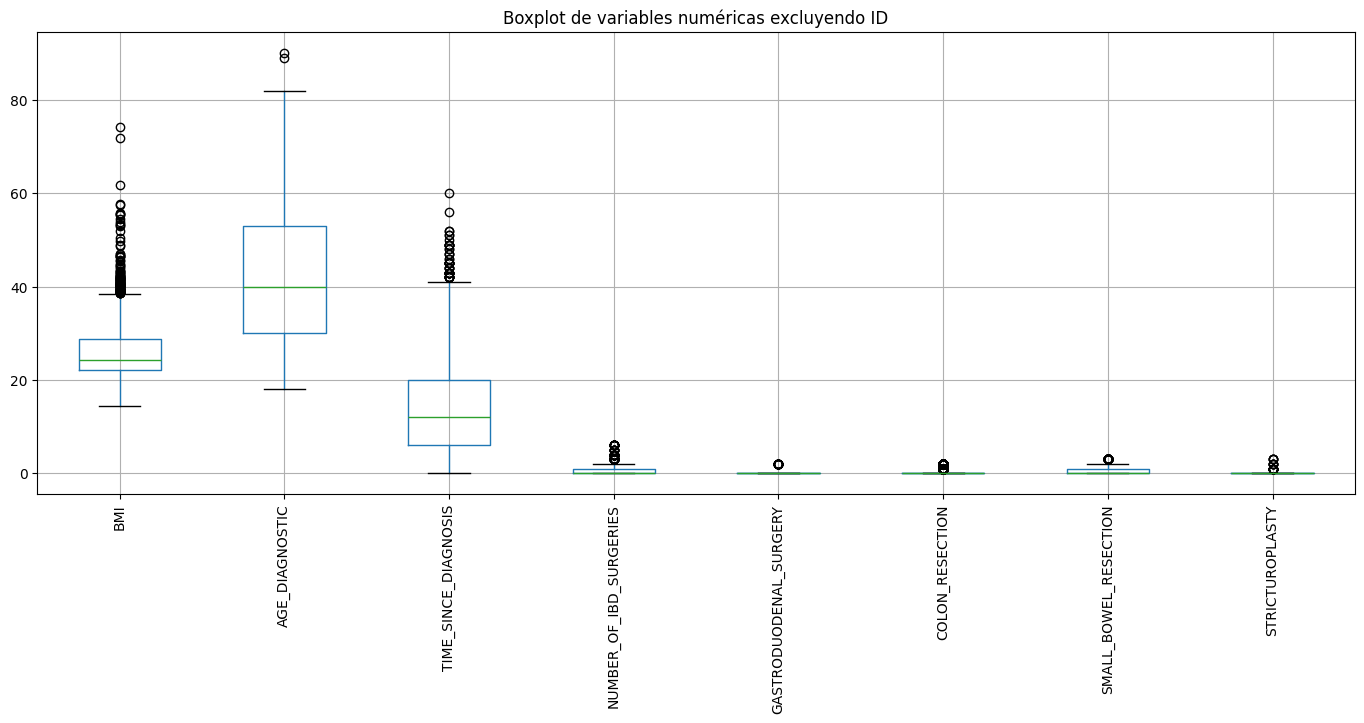

In [318]:
#Pasar a numericas menos id

cols_to_convert = plexus_numeric.columns.difference(['RAW_DATA_FILE_NAME'])  # o 'eid', según el caso

for col in cols_to_convert:
    plexus_numeric[col] = pd.to_numeric(plexus_numeric[col], errors='coerce')



# Seleccionar todas las columnas excepto 'eid'
cols_to_plot = plexus_numeric.drop(columns=['RAW_DATA_FILE_NAME'])

# Boxplot 
cols_to_plot.boxplot(figsize=(17,6))
plt.title('Boxplot de variables numéricas excluyendo ID')
plt.xticks(rotation=90)
plt.show()

In [320]:
#Eliminar outiliers
def remove_outliers(df, id_col, lower=0.03, upper=0.97, drop_rows=True):
    """
    Elimina outliers del DataFrame basado en percentiles columna por columna.
    
    Parámetros:
        df (pd.DataFrame): El DataFrame original.
        id_col (str): Nombre de la columna categórica que no se debe procesar.
        lower (float): Percentil inferior (por defecto 0.05).
        upper (float): Percentil superior (por defecto 0.95).
        drop_rows (bool): Si True, elimina filas con outliers. 
                          Si False, reemplaza outliers por NaN.
                          
    Retorna:
        pd.DataFrame: DataFrame sin outliers.
    """
    df = df.copy()
    
    # Asegurarse de que id_col esté presente
    if id_col not in df.columns:
        raise ValueError(f"La columna '{id_col}' no está en el DataFrame.")

    # Extraer columna ID
    id_series = df[[id_col]].astype(str)

    
    # Filtrar solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number]).copy()
    
    # Calcular percentiles
    q_low = numeric_df.quantile(lower)
    q_high = numeric_df.quantile(upper)
    
    # Crear máscara booleana
    mask = (numeric_df >= q_low) & (numeric_df <= q_high)
    
    if drop_rows:
        filtered_numeric = numeric_df[mask.all(axis=1)]
        id_filtered = id_series.loc[filtered_numeric.index]
        return pd.concat([id_filtered, filtered_numeric], axis=1)
    else:
        clipped_numeric = numeric_df.mask(~mask, np.nan)
        return pd.concat([id_series, clipped_numeric], axis=1)


plexus_numeric_noOutliers=remove_outliers(plexus_numeric,id_col='RAW_DATA_FILE_NAME', lower=0.05, upper=0.95, drop_rows=False)




In [321]:
#Escalar
from sklearn.preprocessing import StandardScaler

def scale_numeric_columns(df, id_col):
    """
    Escala las columnas numéricas del DataFrame, excluyendo la columna id_col.

    Parámetros:
        df (pd.DataFrame): DataFrame a escalar.
        id_col (str): Nombre de la columna de identificación (no se escala).

    Retorna:
        pd.DataFrame: DataFrame con columnas numéricas escaladas y id_col intacta.
    """
    df = df.copy()

    if id_col not in df.columns:
        raise ValueError(f"La columna '{id_col}' no está en el DataFrame.")

    # Separar columna ID
    id_series = df[[id_col]].astype(str)

    # Seleccionar columnas numéricas
    numeric_df = df.drop(columns=[id_col]).select_dtypes(include=[np.number])

    # Escalar
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns, index=numeric_df.index)

    # Concatenar columna ID y columnas escaladas
    return pd.concat([id_series, scaled_df], axis=1)

plexus_numeric_scaled=scale_numeric_columns(plexus_numeric_noOutliers, 'RAW_DATA_FILE_NAME')

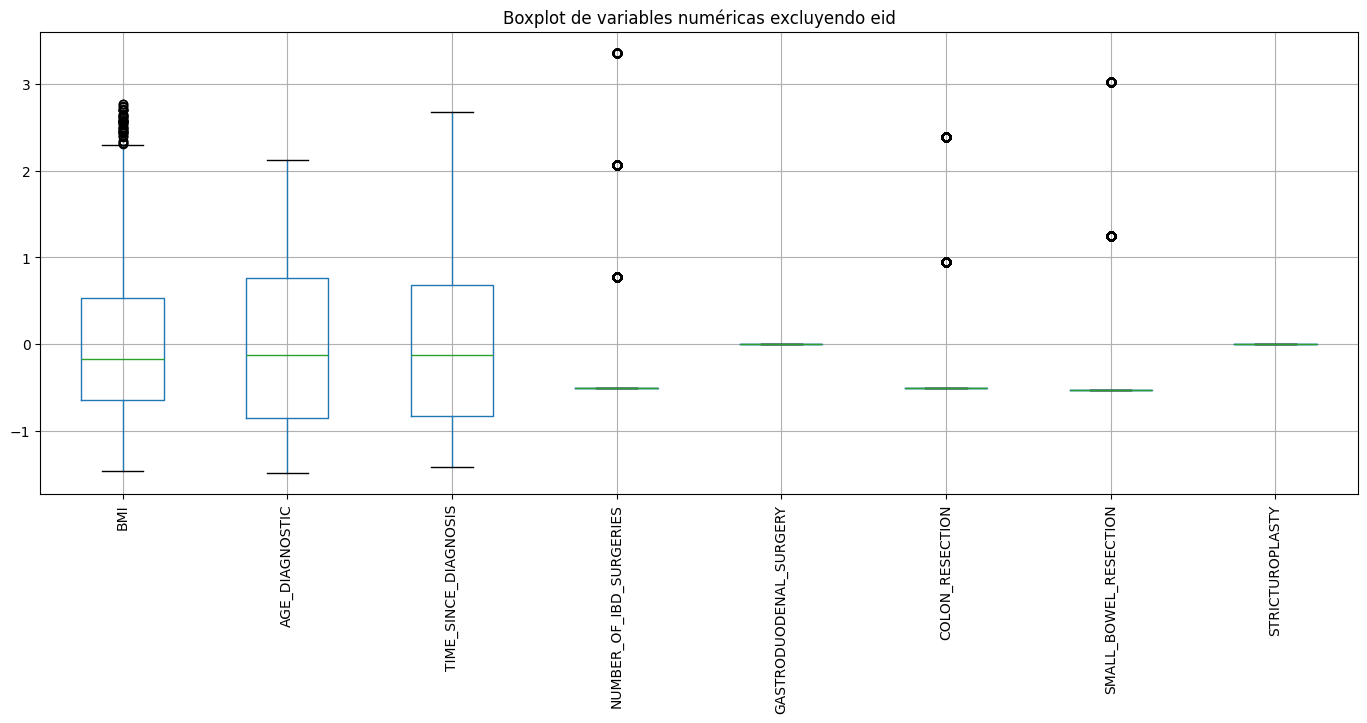

In [322]:
#Visualizar 
# Seleccionar todas las columnas excepto 'eid'
cols_to_plot = plexus_numeric_scaled.drop(columns=['RAW_DATA_FILE_NAME'])

# Boxplot 
cols_to_plot.boxplot(figsize=(17,6))
plt.title('Boxplot de variables numéricas excluyendo eid')
plt.xticks(rotation=90)
plt.show()

In [323]:
plexus_numeric_scaled

,RAW_DATA_FILE_NAME,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,COLON_RESECTION,SMALL_BOWEL_RESECTION,STRICTUROPLASTY
0,10430233,0.109695,NaN,-0.595053,0.779107,0.0,-0.502313,1.248375,0.0
1,FR23841213,-0.169264,1.159613,NaN,NaN,0.0,-0.502313,NaN,NaN
2,FR17213021,-0.169264,1.800744,-0.944794,2.065102,0.0,-0.502313,1.248375,NaN
3,FR23829990,-0.169264,1.961026,-0.711633,2.065102,0.0,-0.502313,1.248375,NaN
4,FR20539652,-0.412743,-0.763780,0.104428,-0.506889,0.0,-0.502313,-0.528413,0.0
...,...,...,...,...,...,...,...,...,...
2245,FR27851455,-0.169264,-1.324770,-0.361893,-0.506889,0.0,-0.502313,-0.528413,0.0
2246,FR24484026,-1.460001,-1.485053,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0
2247,FR24484087,-0.169264,-1.164487,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0
2248,FR21153371,0.411581,1.800744,0.920490,0.779107,0.0,2.392304,1.248375,0.0


#### Categoricas

In [298]:
plexus_categoric

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,SMALL_BOWEL_RESECTION_DUODENUM,SMALL_BOWEL_RESECTION_ILEUM,SMALL_BOWEL_RESECTION_JEJUNUM,COMPLETE_COLECTOMY,ILEOSTOMY/COLOSTOMY,...,MESALAMINE,METHOTREXATE,NATALIZUMAB,OTHER_BIOLOGIC,SULFASALAZINE,THIOPURINE_UNSPECIFIED,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE
0,10430233,Female,Crohn's Disease,Black or African American,Not Hispanic or Latino,No,Yes,No,No,No,...,Ever,Never,Never,Never,Never,Never,Never,Never,Never,No
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",No,Yes,No,No,No,...,Ever,Ever,Never,Never,Never,Ever,Never,Never,Ever,No
2,FR17213021,Female,Crohn's Disease,White,Not Hispanic or Latino,No,Yes,No,Yes,No,...,Never,Ever,Never,Never,Never,Never,Never,Never,Never,No
3,FR23829990,Female,Crohn's Disease,White,Not Hispanic or Latino,No,Yes,No,Yes,No,...,Never,Ever,Never,Never,Never,Never,Never,Never,Ever,No
4,FR20539652,Male,Ulcerative Colitis,White,Hispanic or Latino,No,No,No,No,No,...,Ever,Never,Never,Never,Never,Never,Never,Never,Never,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,No,No,No,No,No,...,Never,Ever,Never,Never,Never,Never,Never,Ever,Ever,No
2246,FR24484026,Female,Ulcerative Colitis,Native American;White,Not Hispanic or Latino,No,No,No,No,No,...,Ever,Never,Never,Never,Never,Never,Never,Never,Ever,No
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,No,Yes,No,No,No,...,Ever,Never,Never,Never,Never,Never,Never,Never,Never,Yes
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,No,Yes,No,No,No,...,Ever,Ever,Never,Never,Never,Never,Never,Ever,Never,No


##### Categoricas Nominales

In [ ]:
# Columnas a excluir para crear dummies
exclude_cols = ['RAW_DATA_FILE_NAME','DIAGNOSIS']

# Filtrar las columnas nominales para crear dummies (excluir las de la lista)
cols_to_dummify = [col for col in plexus_categoric if col not in exclude_cols]

# Inicializar DataFrame vacío con el mismo índice
plexus_dummies = pd.DataFrame(index=plexus_categoric.index)

# Crear dummies solo para las columnas filtradas
for col in cols_to_dummify:
    serie_filtrada = plexus_categoric[col].replace(
        {"Prefer not to answer": np.nan, "Do not know": np.nan}
    )
    dummies = pd.get_dummies(serie_filtrada, prefix=col, dummy_na=False)
    plexus_dummies = pd.concat([plexus_dummies, dummies], axis=1)

# Finalmente, añadir las columnas excluidas al DataFrame final
plexus_dummies['DIAGNOSIS'] = plexus_categoric['DIAGNOSIS']
plexus_dummies['RAW_DATA_FILE_NAME'] = plexus_categoric['RAW_DATA_FILE_NAME']


plexus_dummies

,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian)","RACE_Asian (East Asian, South Asian, Southeast Asian); Korean","RACE_Asian (East Asian, South Asian, Southeast Asian); Other Asian","RACE_Asian (East Asian, South Asian, Southeast Asian); White","RACE_Asian; Asian (East Asian, South Asian, Southeast Asian)","RACE_Asian; Asian (East Asian, South Asian, Southeast Asian);White",...,TOFACITINIB_Ever,TOFACITINIB_Never,USTEKINUMAB_Ever,USTEKINUMAB_Never,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,DIAGNOSIS,RAW_DATA_FILE_NAME
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,Crohn's Disease,10430233
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,Crohn's Disease,FR23841213
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,Crohn's Disease,FR17213021
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,Crohn's Disease,FR23829990
4,False,True,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,Ulcerative Colitis,FR20539652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,False,True,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,True,False,Crohn's Disease,FR27851455
2246,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,Ulcerative Colitis,FR24484026
2247,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,Crohn's Disease,FR24484087
2248,False,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,False,Crohn's Disease,FR21153371


In [328]:
# Ordenar las columnas de phenotypes_df, Disease de segunda columna
plexus_dummies= plexus_dummies[['RAW_DATA_FILE_NAME', 'DIAGNOSIS'] + [col for col in plexus_dummies.columns if col not in ['RAW_DATA_FILE_NAME', 'DIAGNOSIS']]]
plexus_dummies

,RAW_DATA_FILE_NAME,DIAGNOSIS,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian)","RACE_Asian (East Asian, South Asian, Southeast Asian); Korean","RACE_Asian (East Asian, South Asian, Southeast Asian); Other Asian","RACE_Asian (East Asian, South Asian, Southeast Asian); White",...,THIOPURINE_UNSPECIFIED_Ever,THIOPURINE_UNSPECIFIED_Never,TOFACITINIB_Ever,TOFACITINIB_Never,USTEKINUMAB_Ever,USTEKINUMAB_Never,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes
0,10430233,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,False
1,FR23841213,Crohn's Disease,True,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
2,FR17213021,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,False
3,FR23829990,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,True,False
4,FR20539652,Ulcerative Colitis,False,True,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,FR27851455,Crohn's Disease,False,True,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,True,False
2246,FR24484026,Ulcerative Colitis,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,True,False
2247,FR24484087,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
2248,FR21153371,Crohn's Disease,False,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,True,True,False


## Dataset Assembly

merge
pheno_numeric_standard + pheno_dummies + pheno_ordinal_df


In [329]:
plexus_numeric_scaled

,RAW_DATA_FILE_NAME,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,COLON_RESECTION,SMALL_BOWEL_RESECTION,STRICTUROPLASTY
0,10430233,0.109695,NaN,-0.595053,0.779107,0.0,-0.502313,1.248375,0.0
1,FR23841213,-0.169264,1.159613,NaN,NaN,0.0,-0.502313,NaN,NaN
2,FR17213021,-0.169264,1.800744,-0.944794,2.065102,0.0,-0.502313,1.248375,NaN
3,FR23829990,-0.169264,1.961026,-0.711633,2.065102,0.0,-0.502313,1.248375,NaN
4,FR20539652,-0.412743,-0.763780,0.104428,-0.506889,0.0,-0.502313,-0.528413,0.0
...,...,...,...,...,...,...,...,...,...
2245,FR27851455,-0.169264,-1.324770,-0.361893,-0.506889,0.0,-0.502313,-0.528413,0.0
2246,FR24484026,-1.460001,-1.485053,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0
2247,FR24484087,-0.169264,-1.164487,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0
2248,FR21153371,0.411581,1.800744,0.920490,0.779107,0.0,2.392304,1.248375,0.0


In [330]:
plexus_dummies

,RAW_DATA_FILE_NAME,DIAGNOSIS,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian)","RACE_Asian (East Asian, South Asian, Southeast Asian); Korean","RACE_Asian (East Asian, South Asian, Southeast Asian); Other Asian","RACE_Asian (East Asian, South Asian, Southeast Asian); White",...,THIOPURINE_UNSPECIFIED_Ever,THIOPURINE_UNSPECIFIED_Never,TOFACITINIB_Ever,TOFACITINIB_Never,USTEKINUMAB_Ever,USTEKINUMAB_Never,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes
0,10430233,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,False
1,FR23841213,Crohn's Disease,True,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
2,FR17213021,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,False
3,FR23829990,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,True,False
4,FR20539652,Ulcerative Colitis,False,True,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,FR27851455,Crohn's Disease,False,True,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,True,False
2246,FR24484026,Ulcerative Colitis,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,True,False
2247,FR24484087,Crohn's Disease,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
2248,FR21153371,Crohn's Disease,False,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,True,True,False


In [333]:
# Primer merge entre pheno_numeric_standard y pheno_dummies
df_final = pd.merge(plexus_numeric_scaled, plexus_dummies, on='RAW_DATA_FILE_NAME', how='inner')

#ordenar 
# Ordenar las columnas de phenotypes_df, Disease de segunda columna
df_final = df_final[['RAW_DATA_FILE_NAME', 'DIAGNOSIS'] + [col for col in df_final.columns if col not in ['RAW_DATA_FILE_NAME', 'DIAGNOSIS']]]

# Si prefieres que 'eid' sea el índice
df_final = df_final.set_index('RAW_DATA_FILE_NAME')

df_final


,DIAGNOSIS,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,COLON_RESECTION,SMALL_BOWEL_RESECTION,STRICTUROPLASTY,SEX_Female,...,THIOPURINE_UNSPECIFIED_Ever,THIOPURINE_UNSPECIFIED_Never,TOFACITINIB_Ever,TOFACITINIB_Never,USTEKINUMAB_Ever,USTEKINUMAB_Never,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes
RAW_DATA_FILE_NAME,,,,,,,,,,,,,,,,,,,,,
10430233,Crohn's Disease,0.109695,NaN,-0.595053,0.779107,0.0,-0.502313,1.248375,0.0,True,...,False,True,False,True,False,True,False,True,True,False
FR23841213,Crohn's Disease,-0.169264,1.159613,NaN,NaN,0.0,-0.502313,NaN,NaN,True,...,True,False,False,True,False,True,True,False,True,False
FR17213021,Crohn's Disease,-0.169264,1.800744,-0.944794,2.065102,0.0,-0.502313,1.248375,NaN,True,...,False,True,False,True,False,True,False,True,True,False
FR23829990,Crohn's Disease,-0.169264,1.961026,-0.711633,2.065102,0.0,-0.502313,1.248375,NaN,True,...,False,True,False,True,False,True,True,False,True,False
FR20539652,Ulcerative Colitis,-0.412743,-0.763780,0.104428,-0.506889,0.0,-0.502313,-0.528413,0.0,False,...,False,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FR27851455,Crohn's Disease,-0.169264,-1.324770,-0.361893,-0.506889,0.0,-0.502313,-0.528413,0.0,False,...,False,True,False,True,True,False,True,False,True,False
FR24484026,Ulcerative Colitis,-1.460001,-1.485053,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0,True,...,False,True,False,True,False,True,True,False,True,False
FR24484087,Crohn's Disease,-0.169264,-1.164487,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0,True,...,False,True,False,True,False,True,False,True,False,True


In [334]:
#imputar por la media segun CONDICION
df_final_imputed = impute(df_final)

In [335]:
#Guardar en memo
df_final_imputed.to_csv(os.path.join(path_outputs, "plexus_inputed_data_ready.csv"))

## Modelado

In [336]:
# Phenotypes
plexus_final= pd.read_csv("/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/Output/plexus_inputed_data_ready.csv", sep="," , index_col= "RAW_DATA_FILE_NAME")
# Eliminar la columna 'condicion'
plexus_final

,DIAGNOSIS,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,NUMBER_OF_IBD_SURGERIES,GASTRODUODENAL_SURGERY,COLON_RESECTION,SMALL_BOWEL_RESECTION,STRICTUROPLASTY,SEX_Female,...,THIOPURINE_UNSPECIFIED_Ever,THIOPURINE_UNSPECIFIED_Never,TOFACITINIB_Ever,TOFACITINIB_Never,USTEKINUMAB_Ever,USTEKINUMAB_Never,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes
RAW_DATA_FILE_NAME,,,,,,,,,,,,,,,,,,,,,
10430233,Crohn's Disease,0.109695,-0.683639,-0.595053,0.779107,0.0,-0.502313,1.248375,0.0,True,...,False,True,False,True,False,True,False,True,True,False
FR23841213,Crohn's Disease,-0.169264,1.159613,-0.595053,-0.506889,0.0,-0.502313,-0.528413,0.0,True,...,True,False,False,True,False,True,True,False,True,False
FR17213021,Crohn's Disease,-0.169264,1.800744,-0.944794,2.065102,0.0,-0.502313,1.248375,0.0,True,...,False,True,False,True,False,True,False,True,True,False
FR23829990,Crohn's Disease,-0.169264,1.961026,-0.711633,2.065102,0.0,-0.502313,1.248375,0.0,True,...,False,True,False,True,False,True,True,False,True,False
FR20539652,Ulcerative Colitis,-0.412743,-0.763780,0.104428,-0.506889,0.0,-0.502313,-0.528413,0.0,False,...,False,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FR27851455,Crohn's Disease,-0.169264,-1.324770,-0.361893,-0.506889,0.0,-0.502313,-0.528413,0.0,False,...,False,True,False,True,True,False,True,False,True,False
FR24484026,Ulcerative Colitis,-1.460001,-1.485053,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0,True,...,False,True,False,True,False,True,True,False,True,False
FR24484087,Crohn's Disease,-0.169264,-1.164487,-1.411115,-0.506889,0.0,-0.502313,-0.528413,0.0,True,...,False,True,False,True,False,True,False,True,False,True


In [337]:
plexus_final.dtypes

DIAGNOSIS                                                                      object
BMI                                                                           float64
AGE_DIAGNOSTIC                                                                float64
TIME_SINCE_DIAGNOSIS                                                          float64
NUMBER_OF_IBD_SURGERIES                                                       float64
                                                                               ...   
USTEKINUMAB_Never                                                                bool
VEDOLIZUMAB_Ever                                                                 bool
VEDOLIZUMAB_Never                                                                bool
CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No        bool
CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes       bool
Length: 117, dtype: object

In [340]:
#undersampling


# Separar los datos
CD = plexus_final[plexus_final['DIAGNOSIS'] == 'Crohn\'s Disease']
UC = plexus_final[plexus_final['DIAGNOSIS'] == 'Ulcerative Colitis']

# Ver cuántos casos CD hay
print(f"Casos CD: {len(CD)}")

# Ver cuántos casos UC hay
print(f"Casos UC: {len(UC)}")

# Undersample CD para igualar el número de IBD
CD_downsampled = CD.sample(n=len(UC), random_state=42)

# Unir ambos subconjuntos
balanced_df = pd.concat([CD_downsampled, UC])

# Mezclar aleatoriamente
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación rápida
print(balanced_df['DIAGNOSIS'].value_counts())


Casos CD: 1361
Casos UC: 885
DIAGNOSIS
Ulcerative Colitis    885
Crohn's Disease       885
Name: count, dtype: int64


In [341]:
# Separar X e y
X = balanced_df.drop(columns='DIAGNOSIS')
y = balanced_df['DIAGNOSIS']

# Dividir en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Lasso

In [ ]:
#Regresion lasso 

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = pLEXUS_final.drop('DIAGNOSIS', axis=1)
y = pLEXUS_final['DIAGNOSIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

ValueError: could not convert string to float: 'Control'

### Random Forest


In [ ]:
shap.initjs()

In [342]:
# Entrenar modelo
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluar
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

   Crohn's Disease       0.94      0.86      0.90       285
Ulcerative Colitis       0.86      0.94      0.90       246

          accuracy                           0.90       531
         macro avg       0.90      0.90      0.90       531
      weighted avg       0.90      0.90      0.90       531



In [355]:
clf.classes_

array(["Crohn's Disease", 'Ulcerative Colitis'], dtype=object)

In [343]:
importances = clf.feature_importances_

# Crear un DataFrame para verlo mejor
importances_df = pd.DataFrame({'variable': X.columns, 'importancia': importances})

# Ordenar de mayor a menor
importances_df = importances_df.sort_values(by='importancia', ascending=False)
importances_df

,variable,importancia
51,SMALL_BOWEL_RESECTION_ILEUM_No,0.153056
52,SMALL_BOWEL_RESECTION_ILEUM_Yes,0.145438
0,BMI,0.130391
1,AGE_DIAGNOSTIC,0.047841
2,TIME_SINCE_DIAGNOSIS,0.047707
...,...,...
4,GASTRODUODENAL_SURGERY,0.000000
13,"RACE_Asian (East Asian, South Asian, Southeast...",0.000000
46,ETHNICITY_Not Hispanic or Latino; Unknown,0.000000
19,RACE_Asian; White,0.000000


In [344]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

In [345]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')

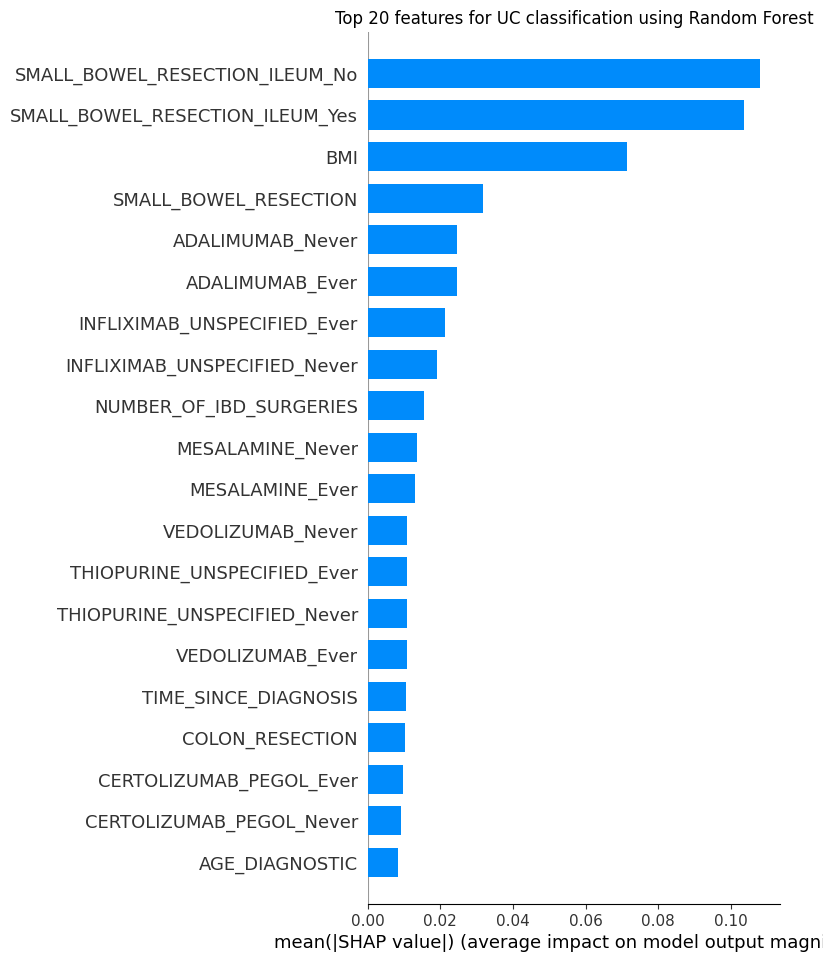

In [357]:
# Crear el plot SHAP (summary bar plot)
shap.summary_plot(shap_values[:,:,1], X_test, show=False, plot_type="bar", max_display=20) #shap_values[:,:,1] → SHAP para Ulcerative Colitis
# Agregar título con matplotlib
plt.title("Top 20 features for UC classification using Random Forest")
# Mostrar la figura con el título
plt.show()

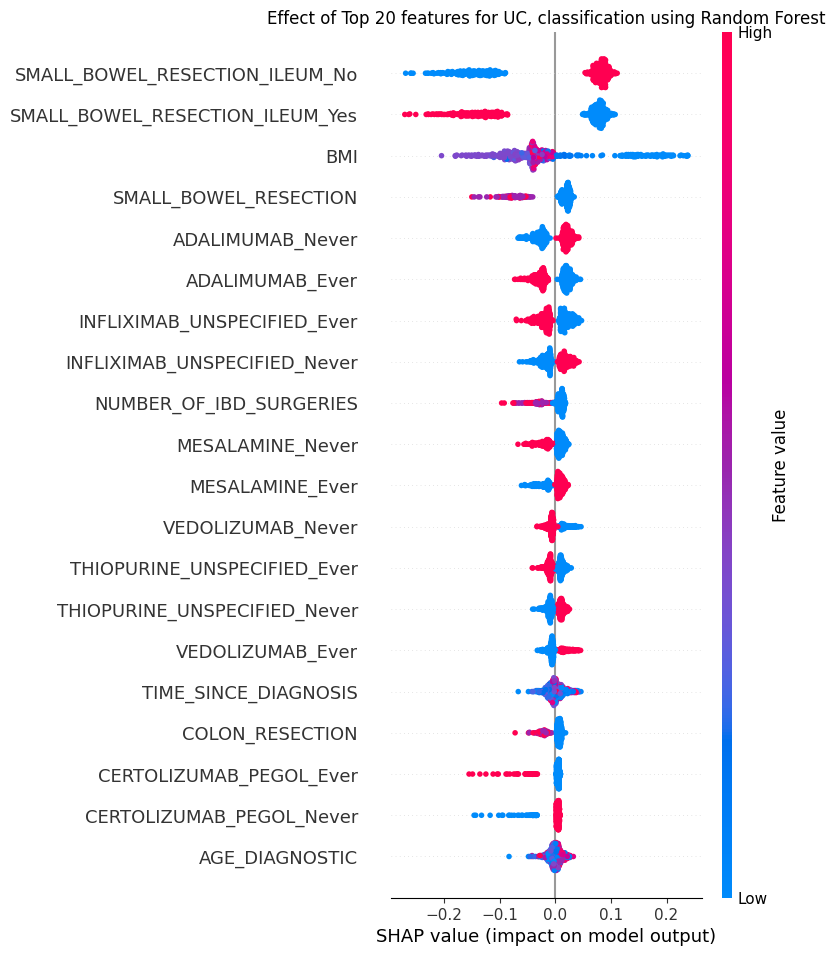

In [356]:
shap.summary_plot(shap_values[:,:,1], X_test, show=False) ##shap_values[:,:,1] → SHAP para Ulcerative Colitis
plt.title("Effect of Top 20 features for UC, classification using Random Forest")
plt.show()

In [348]:
#importancia de las variables

importances = clf.feature_importances_
importances_df = pd.DataFrame({'variable': X.columns, 'importancia': importances})
importances_df = importances_df.sort_values(by='importancia', ascending=False)
top_varsRF = importances_df

top_varsRF

,variable,importancia
51,SMALL_BOWEL_RESECTION_ILEUM_No,0.153056
52,SMALL_BOWEL_RESECTION_ILEUM_Yes,0.145438
0,BMI,0.130391
1,AGE_DIAGNOSTIC,0.047841
2,TIME_SINCE_DIAGNOSIS,0.047707
...,...,...
4,GASTRODUODENAL_SURGERY,0.000000
13,"RACE_Asian (East Asian, South Asian, Southeast...",0.000000
46,ETHNICITY_Not Hispanic or Latino; Unknown,0.000000
19,RACE_Asian; White,0.000000


### XGBoost

In [349]:
#Passar clase a label numerico
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [350]:
#Crear modelo 
XGBmodel = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_stimators=1000)
XGBmodel.fit(X_train, y_train)

/Users/fjosesala/Documents/GitHub/Olink_Plexus/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, n_stimators=1000, ...)

In [351]:
# Realizamos predicciones en el conjunto de prueba
y_pred = XGBmodel.predict(X_test)

# Evaluamos el modelo
accuracy = XGBmodel.score(X_test, y_test)
print('Precisión:', accuracy)


Precisión: 0.9096045197740112


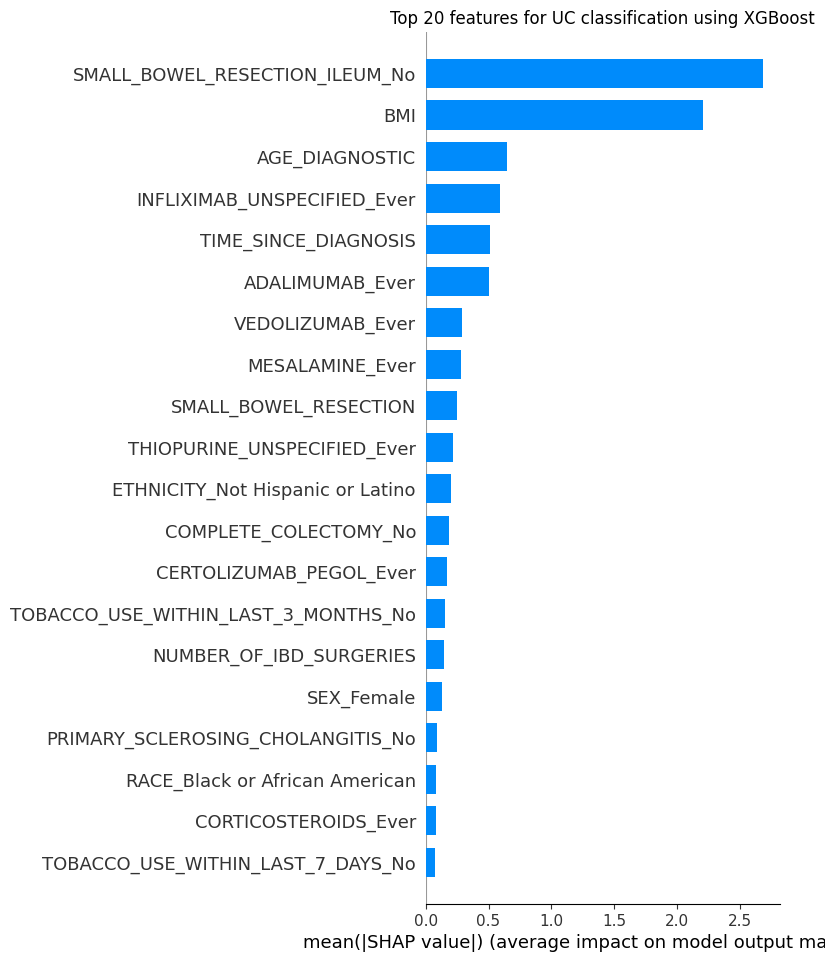

In [358]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')
explainer2 = shap.Explainer(XGBmodel)
shap_values2 = explainer2(X_test)
# Crear el plot SHAP (summary bar plot)
shap.summary_plot(shap_values2, X_test, plot_type="bar", max_display=20, show=False)
# Agregar título con matplotlib
plt.title("Top 20 features for UC classification using XGBoost")
# Mostrar la figura con el título
plt.show()

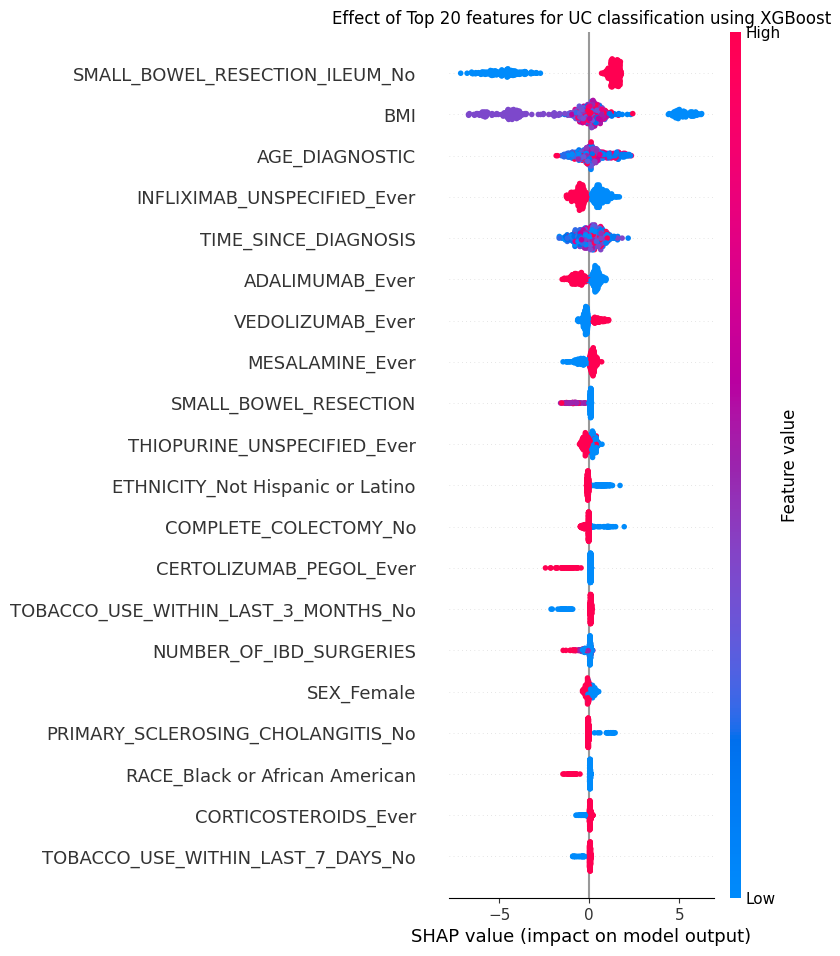

In [359]:
#Prob de tener ibd. valores rojos a la izq reducen la prob de tener ibd
# Crear el plot SHAP (summary bar plot)
shap.summary_plot(shap_values2, X_test, plot_type="dot", max_display=20, show=False)
# Agregar título con matplotlib
plt.title("Effect of Top 20 features for UC classification using XGBoost")
# Mostrar la figura con el título
plt.show()

In [ ]:
"""Comparar los SHAP de clase UC vs CD directamente (por ejemplo, usando multiclass SHAP si estás clasificando entre UC/CD/None).

Hacer análisis de importancia cruzada: ¿cuáles variables discriminan bien UC pero no CD, y viceversa?

Generar perfiles clínicos simulados con valores extremos de SHAP para cada clase y discutirlos.
"""


In [354]:
# Obtener la importancia de cada variable del modelo XGBoost MEDIANTE SHAP - MAS CONFIABLE

# Calcular la media del valor absoluto de SHAP por variable
shap_importance = np.abs(shap_values2.values).mean(axis=0)

# Crear un DataFrame con nombres de variables
shap_df = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': shap_importance
})

# Ordenar por importancia
shap_df = shap_df.sort_values(by='mean_abs_shap', ascending=False)

# Ver top 20 variables más importantes
top_varsXGB = shap_df
print(top_varsXGB)

                                               feature  mean_abs_shap
51                      SMALL_BOWEL_RESECTION_ILEUM_No       2.684670
0                                                  BMI       2.204856
1                                       AGE_DIAGNOSTIC       0.642972
94                         INFLIXIMAB_UNSPECIFIED_Ever       0.593033
2                                 TIME_SINCE_DIAGNOSIS       0.511131
..                                                 ...            ...
39   ETHNICITY_Non-Hispanic or Latino; Not Hispanic...       0.000000
38                    ETHNICITY_Non-Hispanic or Latino       0.000000
37   ETHNICITY_NON-HISPANIC OR LATINO/A; Not Hispan...       0.000000
35               ETHNICITY_Hispanic or Latino; Unknown       0.000000
115  CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_...       0.000000

[116 rows x 2 columns]


### ARM

## Validacion
